<a href="https://colab.research.google.com/github/NugulaThrishani/Skin-Cancer/blob/main/Deep1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow keras numpy pandas matplotlib scikit-learn opencv-python

In [ ]:
# Install Kaggle CLI (if not already installed)
!pip install -q kaggle

# Download the Skin Cancer dataset
!kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign

# Unzip the dataset
!unzip -q skin-cancer-malignant-vs-benign.zip -d dataset

Dataset URL: https://www.kaggle.com/datasets/fanconic/skin-cancer-malignant-vs-benign
License(s): unknown
100% 324M/325M [00:12<00:00, 29.2MB/s]
100% 325M/325M [00:12<00:00, 26.8MB/s]


In [ ]:
import os
base_dir = "/content/dataset"  # Default Colab working directory
print(os.listdir(base_dir))  # Should print ['train', 'test']
print(os.listdir(base_dir + "/train"))  # Should print ['benign', 'malignant']

['data', 'test', 'train']
['malignant', 'benign']


In [ ]:
import os
base_dir = "/content/dataset"
print("Contents of /content/dataset:", os.listdir(base_dir))
print("Contents of /content/dataset/data:", os.listdir(base_dir + "/data"))
print("Contents of /content/dataset/train:", os.listdir(base_dir + "/train"))
print("Contents of /content/dataset/test:", os.listdir(base_dir + "/test"))

Contents of /content/dataset: ['data', 'test', 'train']
Contents of /content/dataset/data: ['test', 'train']
Contents of /content/dataset/train: ['malignant', 'benign']
Contents of /content/dataset/test: ['malignant', 'benign']


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define base path
base_dir = "/content/dataset"  # This seems correct based on your output

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data (80% train, 20% validation)
train_generator = train_datagen.flow_from_directory(
    base_dir + "/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    base_dir + "/train",
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    base_dir + "/test",
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Check class indices
print("Class indices:", train_generator.class_indices)

Found 2110 images belonging to 2 classes.
Found 527 images belonging to 2 classes.
Found 660 images belonging to 2 classes.
Class indices: {'benign': 0, 'malignant': 1}


In [ ]:
import os
print("Train malignant:", len(os.listdir("/content/dataset/train/malignant")))
print("Train benign:", len(os.listdir("/content/dataset/train/benign")))
print("Test malignant:", len(os.listdir("/content/dataset/test/malignant")))
print("Test benign:", len(os.listdir("/content/dataset/test/benign")))

Train malignant: 1197
Train benign: 1440
Test malignant: 300
Test benign: 360


In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

# Load pre-trained MobileNet
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze base layers

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)  # Prevent overfitting
predictions = Dense(1, activation='sigmoid')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=15,  # Adjust based on performance
    validation_data=validation_generator
)

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.4f}")

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.7161 - loss: 0.5602 - val_accuracy: 0.7970 - val_loss: 0.4484
Epoch 2/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.8293 - loss: 0.3678 - val_accuracy: 0.8065 - val_loss: 0.4139
Epoch 3/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.8554 - loss: 0.3173 - val_accuracy: 0.7989 - val_loss: 0.4299
Epoch 4/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.8583 - loss: 0.3161 - val_accuracy: 0.7989 - val_loss: 0.4162
Epoch 5/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.8736 - loss: 0.2826 - val_accuracy: 0.8046 - val_loss: 0.4167
Epoch 6/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 135s 2s/step - accuracy: 0.8615 - loss: 0.2938 - val_accuracy: 0.8349 - val_loss: 0.3662
Epoch 7/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.8656 - loss: 0.2735 - val_accuracy: 0.8235 - val_loss: 0.4044
Epoch 8/15
66/66 ━━━━━━━━━━━━━━━━━━━━ 136s 2s/step - accuracy: 0.8679 - loss: 0.2832 - val_accuracy: 0.8008 - v

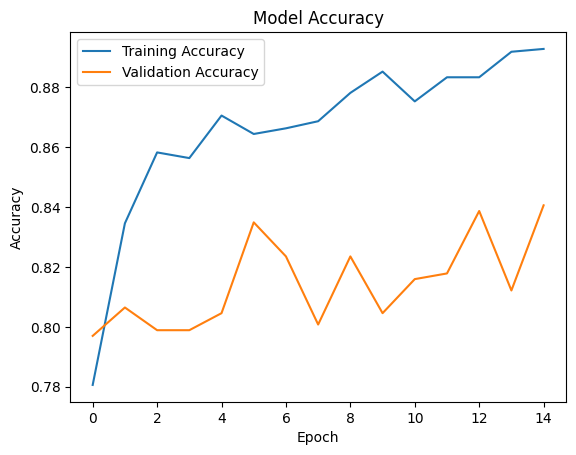

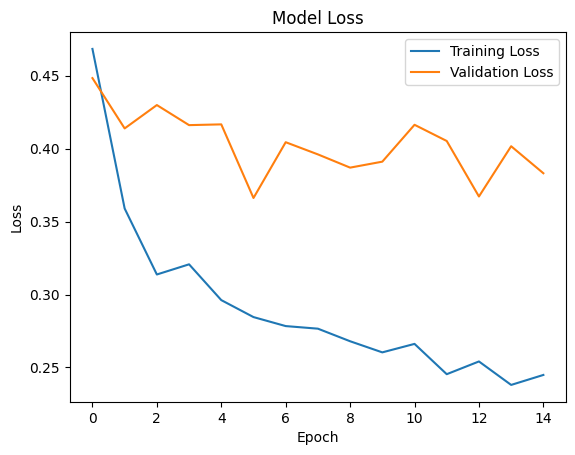

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Save the model in native Keras format
model.save("skin_cancer_model.keras")
print("Model saved as skin_cancer_model.keras")

Model saved as skin_cancer_model.keras


In [ ]:
# Save in both formats
model.save("skin_cancer_model.h5")    # Legacy HDF5
model.save("skin_cancer_model.keras")  # Native Keras
print("Model saved as skin_cancer_model.h5 and skin_cancer_model.keras")

Model saved as skin_cancer_model.h5 and skin_cancer_model.keras


In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.4f}")

21/21 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.8499 - loss: 0.3025
Test Accuracy: 0.8591


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Get predictions
y_pred = (model.predict(test_generator) > 0.5).astype(int)
y_true = test_generator.classes

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

# Classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=["Benign", "Malignant"]))

21/21 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step
Confusion Matrix:
[[311  49]
 [ 44 256]]

Classification Report:
              precision    recall  f1-score   support

      Benign       0.88      0.86      0.87       360
   Malignant       0.84      0.85      0.85       300

    accuracy                           0.86       660
   macro avg       0.86      0.86      0.86       660
weighted avg       0.86      0.86      0.86       660



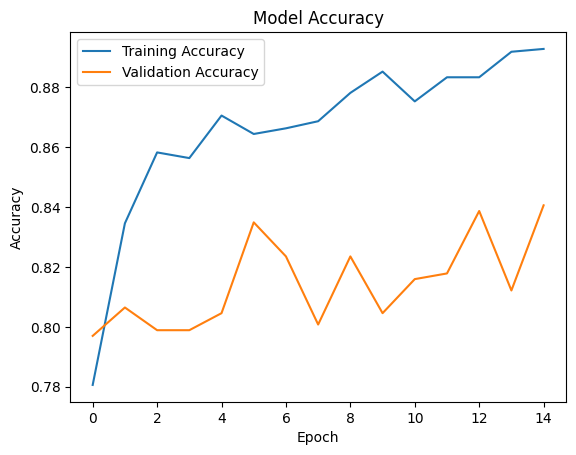

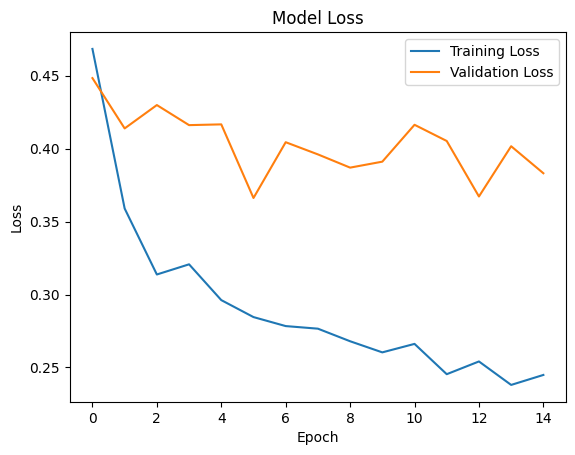

In [ ]:
import matplotlib.pyplot as plt

# Accuracy plot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

def predict_image(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    pred = model.predict(img_array)[0][0]
    return "Malignant" if pred > 0.5 else "Benign"

# Test with an image from test set
test_img = "/content/dataset/test/benign/10.jpg"  # Adjust path
print(predict_image(test_img, model))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 728ms/step
Benign


In [ ]:
base_model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=5, validation_data=validation_generator)

Epoch 1/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 499s 7s/step - accuracy: 0.5941 - loss: 1.6284 - val_accuracy: 0.8083 - val_loss: 0.4612
Epoch 2/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 481s 7s/step - accuracy: 0.7263 - loss: 1.0215 - val_accuracy: 0.8008 - val_loss: 0.5089
Epoch 3/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 467s 7s/step - accuracy: 0.7748 - loss: 0.6622 - val_accuracy: 0.7894 - val_loss: 0.5377
Epoch 4/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 468s 7s/step - accuracy: 0.8058 - loss: 0.5257 - val_accuracy: 0.7970 - val_loss: 0.4834
Epoch 5/5
66/66 ━━━━━━━━━━━━━━━━━━━━ 512s 7s/step - accuracy: 0.8453 - loss: 0.4316 - val_accuracy: 0.8046 - val_loss: 0.5168
